In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
from sklearn.utils import resample
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
dailies = pd.read_csv("dailies_concat.csv")
heartrate = pd.read_csv("heartrate_concat.csv")
epochs = pd.read_csv("epochs_concat.csv")

In [3]:
dailies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6301 entries, 0 to 6300
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   activeKilocalories                  6300 non-null   float64
 1   activeTimeInSeconds                 6300 non-null   float64
 2   activityStressDurationInSeconds     5996 non-null   float64
 3   activityType                        6300 non-null   object 
 4   averageHeartRateInBeatsPerMinute    6016 non-null   float64
 5   averageStressLevel                  6299 non-null   float64
 6   bmrKilocalories                     6300 non-null   float64
 7   date                                2169 non-null   float64
 8   distanceInMeters                    6300 non-null   float64
 9   durationInSeconds                   6300 non-null   float64
 10  floorsClimbed                       6300 non-null   float64
 11  floorsClimbedGoal                   6300 no

In [4]:
dailies = dailies.drop(['activeKilocalories' , 'activeTimeInSeconds' , 'activityStressDurationInSeconds' , 'activityType' , 
                                   'averageHeartRateInBeatsPerMinute' , 'averageStressLevel' , 'bmrKilocalories' , 'date' , 
                                   'distanceInMeters' , 'durationInSeconds' , 'floorsClimbed' , 'floorsClimbedGoal' , 'highStressDurationInSeconds' , 
                                   'intensityDurationGoalInSeconds' , 'lowStressDurationInSeconds' , 'maxHeartRateInBeatsPerMinute' , 
                                   'maxStressLevel' , 'mediumStressDurationInSeconds' , 'minHeartRateInBeatsPerMinute' , 
                                   'moderateIntensityDurationInSeconds' , 'restStressDurationInSeconds' , 'startTimeOffsetInSeconds' , 
                                   'restingHeartRateInBeatsPerMinute' , 'steps' , 'stepsGoal' , 'stressDurationInSeconds' , 'stressQualifier' , 
                                   'vigorousIntensityDurationInSeconds'] , axis = 1)
dailies.head()

,id,startTimeInSeconds,summaryId
0,1091_uty_dailies_1,1.602691e+09,x369fc6c-5f872080-15180-6
1,1091_uty_dailies_1,1.602778e+09,x369fc6c-5f887200-15180-6
2,1091_uty_dailies_1,1.602864e+09,x369fc6c-5f89c380-8e44-6
3,1091_uty_dailies_1,1.602950e+09,x369fc6c-5f8b1500-7f80-6
4,1091_uty_dailies_1,1.602864e+09,x369fc6c-5f89c380-15180-6


In [5]:
dailies['new_id'] = dailies['id'].apply(lambda x : x.replace('dailies_',''))
dailies.drop('id' , inplace=True, axis=1)
dailies.head()

,startTimeInSeconds,summaryId,new_id
0,1.602691e+09,x369fc6c-5f872080-15180-6,1091_uty_1
1,1.602778e+09,x369fc6c-5f887200-15180-6,1091_uty_1
2,1.602864e+09,x369fc6c-5f89c380-8e44-6,1091_uty_1
3,1.602950e+09,x369fc6c-5f8b1500-7f80-6,1091_uty_1
4,1.602864e+09,x369fc6c-5f89c380-15180-6,1091_uty_1


In [6]:
heartrate.drop("date" , inplace = True , axis = 1)
heartrate.drop("startTimeInSeconds" , inplace = True , axis = 1)
heartrate.drop("id" , inplace = True , axis = 1)
heartrate.drop("timeseconds" , inplace = True , axis = 1)
heartrate.head()

,HeartRate,summaryId
0,108,x369fc6c-5f872080-15180-6
1,108,x369fc6c-5f872080-15180-6
2,108,x369fc6c-5f872080-15180-6
3,108,x369fc6c-5f872080-15180-6
4,108,x369fc6c-5f872080-15180-6


In [7]:
Dailies_HR = pd.merge(dailies , heartrate , on =['summaryId'])
Dailies_HR.head()

,startTimeInSeconds,summaryId,new_id,HeartRate
0,1.602691e+09,x369fc6c-5f872080-15180-6,1091_uty_1,108
1,1.602691e+09,x369fc6c-5f872080-15180-6,1091_uty_1,108
2,1.602691e+09,x369fc6c-5f872080-15180-6,1091_uty_1,108
3,1.602691e+09,x369fc6c-5f872080-15180-6,1091_uty_1,108
4,1.602691e+09,x369fc6c-5f872080-15180-6,1091_uty_1,108


In [8]:
Dailies_HR.drop("summaryId" , inplace = True , axis = 1)

In [9]:
Dailies_HR.head()

,startTimeInSeconds,new_id,HeartRate
0,1.602691e+09,1091_uty_1,108
1,1.602691e+09,1091_uty_1,108
2,1.602691e+09,1091_uty_1,108
3,1.602691e+09,1091_uty_1,108
4,1.602691e+09,1091_uty_1,108


In [10]:
missing_data = Dailies_HR.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'Missing Values'}, axis =1)
display(missing_data.style.background_gradient('gnuplot2_r'))

,Variable,Missing Values
0,startTimeInSeconds,0
1,new_id,0
2,HeartRate,0


In [11]:
time_HR = []
New_HR_id = []

for i in Dailies_HR['startTimeInSeconds']:
        time_stamp = int(i)
        struct_time = time.localtime(time_stamp) # 轉成時間元組
        timeString = time.strftime("%Y-%m-%d", struct_time) # 轉成字串
        time_HR.append(timeString)
Dailies_HR['time'] = time_HR

count = 0
for j in Dailies_HR['new_id']:
    id_date = j + '_' + time_HR[count]
    count += 1
    New_HR_id.append(id_date)
Dailies_HR['timeId'] = New_HR_id

In [12]:
Dailies_HR.head()

,startTimeInSeconds,new_id,HeartRate,time,timeId
0,1.602691e+09,1091_uty_1,108,2020-10-15,1091_uty_1_2020-10-15
1,1.602691e+09,1091_uty_1,108,2020-10-15,1091_uty_1_2020-10-15
2,1.602691e+09,1091_uty_1,108,2020-10-15,1091_uty_1_2020-10-15
3,1.602691e+09,1091_uty_1,108,2020-10-15,1091_uty_1_2020-10-15
4,1.602691e+09,1091_uty_1,108,2020-10-15,1091_uty_1_2020-10-15


In [13]:
Dailies_HR_new = Dailies_HR.sample(n=8700)
Dailies_HR_new.tail()

,startTimeInSeconds,new_id,HeartRate,time,timeId
16467570,1.647014e+09,1102_mr_4,98,2022-03-12,1102_mr_4_2022-03-12
21172769,1.651507e+09,1102_mrw_2,62,2022-05-03,1102_mrw_2_2022-05-03
21261194,1.653235e+09,1102_mrw_2,87,2022-05-23,1102_mrw_2_2022-05-23
20838210,1.648483e+09,1102_mrw_2,72,2022-03-29,1102_mrw_2_2022-03-29
15731596,1.648829e+09,1102_mr_2,68,2022-04-02,1102_mr_2_2022-04-02


In [14]:
epochs.drop("date" , inplace = True , axis = 1)
epochs.drop("durationInSeconds" , inplace = True , axis = 1)
epochs.drop("intensity" , inplace = True , axis = 1)
epochs.drop("maxMotionIntensity" , inplace = True , axis = 1)
epochs.drop("meanMotionIntensity" , inplace = True , axis = 1)
epochs.drop("met" , inplace = True , axis = 1)
epochs.drop("startTimeOffsetInSeconds" , inplace = True , axis = 1)
epochs.drop("summaryId" , inplace = True , axis = 1)
epochs.head()

,activeKilocalories,activeTimeInSeconds,activityType,distanceInMeters,id,startTimeInSeconds,steps
0,0.0,900.0,SEDENTARY,0.00,1091_uty_epochs_1,1.602752e+09,0.0
1,1.0,60.0,WALKING,6.62,1091_uty_epochs_1,1.602753e+09,8.0
2,0.0,840.0,SEDENTARY,0.00,1091_uty_epochs_1,1.602753e+09,0.0
3,0.0,900.0,SEDENTARY,0.00,1091_uty_epochs_1,1.602754e+09,0.0
4,1.0,60.0,WALKING,17.40,1091_uty_epochs_1,1.602755e+09,21.0


In [15]:
epochs['new_id'] = epochs['id'].apply(lambda x : x.replace('epochs_',''))
epochs.drop("id" , inplace = True , axis = 1)
epochs.head()

,activeKilocalories,activeTimeInSeconds,activityType,distanceInMeters,startTimeInSeconds,steps,new_id
0,0.0,900.0,SEDENTARY,0.00,1.602752e+09,0.0,1091_uty_1
1,1.0,60.0,WALKING,6.62,1.602753e+09,8.0,1091_uty_1
2,0.0,840.0,SEDENTARY,0.00,1.602753e+09,0.0,1091_uty_1
3,0.0,900.0,SEDENTARY,0.00,1.602754e+09,0.0,1091_uty_1
4,1.0,60.0,WALKING,17.40,1.602755e+09,21.0,1091_uty_1


In [16]:
epochs['activityType'].value_counts()

SEDENTARY      247587
WALKING         73510
GENERIC         24136
RUNNING          2907
UNMONITORED       545
Name: activityType, dtype: int64

In [17]:
epochs =  epochs.drop(epochs[epochs['activityType'] == 'GENERIC'].index)
epochs =  epochs.drop(epochs[epochs['activityType'] == 'UNMONITORED'].index)
epochs.drop(index = [171181] , inplace = True)
epochs.shape

(324004, 7)

In [18]:
missing_data = epochs.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'Missing Values'}, axis =1)
display(missing_data.style.background_gradient('gnuplot2_r'))

,Variable,Missing Values
0,activeKilocalories,0
1,activeTimeInSeconds,0
2,activityType,0
3,distanceInMeters,0
4,startTimeInSeconds,0
5,steps,0
6,new_id,0


In [19]:
time_epochs = []
New_epochs_id = []

for t in epochs['startTimeInSeconds']:
        time_stamp = int(t)
        struct_time = time.localtime(time_stamp) # 轉成時間元組
        timeString = time.strftime("%Y-%m-%d", struct_time) # 轉成字串
        time_epochs.append(timeString)
epochs['time'] = time_epochs

counts = 0
for d in epochs['new_id']:
    id_dates = d + '_' + time_epochs[counts]
    counts += 1
    New_epochs_id.append(id_dates)
epochs['timeId'] = New_epochs_id

In [20]:
epochs.head()

,activeKilocalories,activeTimeInSeconds,activityType,distanceInMeters,startTimeInSeconds,steps,new_id,time,timeId
0,0.0,900.0,SEDENTARY,0.00,1.602752e+09,0.0,1091_uty_1,2020-10-15,1091_uty_1_2020-10-15
1,1.0,60.0,WALKING,6.62,1.602753e+09,8.0,1091_uty_1,2020-10-15,1091_uty_1_2020-10-15
2,0.0,840.0,SEDENTARY,0.00,1.602753e+09,0.0,1091_uty_1,2020-10-15,1091_uty_1_2020-10-15
3,0.0,900.0,SEDENTARY,0.00,1.602754e+09,0.0,1091_uty_1,2020-10-15,1091_uty_1_2020-10-15
4,1.0,60.0,WALKING,17.40,1.602755e+09,21.0,1091_uty_1,2020-10-15,1091_uty_1_2020-10-15


In [21]:
epochs['activityType'].value_counts()

SEDENTARY    247587
WALKING       73510
RUNNING        2907
Name: activityType, dtype: int64

In [22]:
# Separate Target Classes
df_1 = epochs[epochs.activityType == 'SEDENTARY']
df_2 = epochs[epochs.activityType == 'WALKING']
df_3 = epochs[epochs.activityType == 'RUNNING']
 
# Upsample minority class
df_1_upsampled = resample(df_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=2900)    # to match majority class

df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=2900)    # to match majority class

df_3_upsampled = resample(df_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=2900)    # to match majority class

# Combine majority class with upsampled minority class
epochs_new = pd.concat([df_1_upsampled , df_2_upsampled , df_3_upsampled])
 
# Display new class counts
epochs_new.activityType.value_counts()

RUNNING      2900
SEDENTARY    2900
WALKING      2900
Name: activityType, dtype: int64

In [23]:
epochs_new.tail()

,activeKilocalories,activeTimeInSeconds,activityType,distanceInMeters,startTimeInSeconds,steps,new_id,time,timeId
31345,3.0,60.0,RUNNING,39.24,1.603293e+09,49.0,1091_mr_10,2020-10-21,1091_mr_10_2020-10-21
24834,1.0,45.0,RUNNING,63.00,1.603540e+09,51.0,1091_uty_8,2020-10-24,1091_uty_8_2020-10-24
287705,1.0,30.0,RUNNING,55.89,1.648547e+09,53.0,1102_mrw_6,2022-03-29,1102_mrw_6_2022-03-29
347514,3.0,110.0,RUNNING,92.34,1.589844e+09,82.0,1092_mr_9,2020-05-19,1092_mr_9_2020-05-19
56421,29.0,180.0,RUNNING,333.36,1.585653e+09,315.0,1092_mrw_1,2020-03-31,1092_mrw_1_2020-03-31


In [24]:
Data = pd.merge(epochs_new , Dailies_HR_new , on=['timeId'])
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30646 entries, 0 to 30645
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   activeKilocalories    30646 non-null  float64
 1   activeTimeInSeconds   30646 non-null  float64
 2   activityType          30646 non-null  object 
 3   distanceInMeters      30646 non-null  float64
 4   startTimeInSeconds_x  30646 non-null  float64
 5   steps                 30646 non-null  float64
 6   new_id_x              30646 non-null  object 
 7   time_x                30646 non-null  object 
 8   timeId                30646 non-null  object 
 9   startTimeInSeconds_y  30646 non-null  float64
 10  new_id_y              30646 non-null  object 
 11  HeartRate             30646 non-null  int64  
 12  time_y                30646 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 3.3+ MB


In [25]:
Data = Data.drop(['startTimeInSeconds_x' , 'new_id_x' , 'time_x' , 'startTimeInSeconds_y' , 'new_id_y' , 'time_y'] , axis = 1)
Data.tail()

,activeKilocalories,activeTimeInSeconds,activityType,distanceInMeters,steps,timeId,HeartRate
30641,5.0,60.0,RUNNING,13.84,12.0,1102_mr_17_2022-05-24,69
30642,3.0,60.0,RUNNING,38.03,37.0,1102_mrw_1_2022-03-29,59
30643,3.0,60.0,RUNNING,38.03,37.0,1102_mrw_1_2022-03-29,64
30644,3.0,60.0,RUNNING,38.03,37.0,1102_mrw_1_2022-03-29,57
30645,3.0,60.0,RUNNING,38.03,37.0,1102_mrw_1_2022-03-29,72


<AxesSubplot:xlabel='activityType', ylabel='HeartRate'>

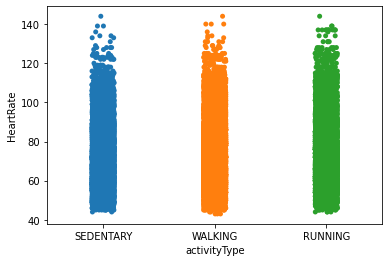

In [26]:
sns.stripplot(x="activityType", y="HeartRate", data = Data)

<AxesSubplot:xlabel='activityType', ylabel='activeKilocalories'>

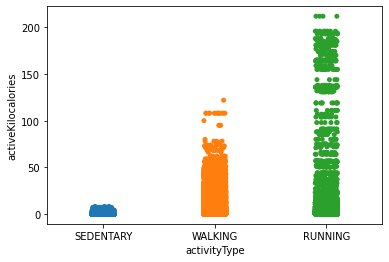

In [28]:
sns.stripplot(x="activityType", y="activeKilocalories", data = Data)

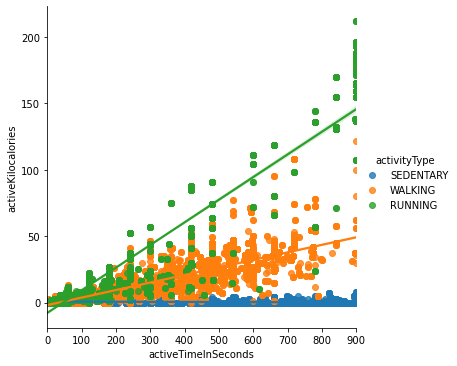

In [60]:
sns.lmplot(x="activeTimeInSeconds", y="activeKilocalories", hue="activityType", data=Data)

In [29]:
Data['activityType'].value_counts()

WALKING      11602
RUNNING       9944
SEDENTARY     9100
Name: activityType, dtype: int64

In [30]:
Data.describe()

,activeKilocalories,activeTimeInSeconds,distanceInMeters,steps,HeartRate
count,30646.000000,30646.000000,30646.000000,30646.000000,30646.000000
mean,7.297951,358.980030,119.573250,132.342949,74.025224
std,20.308177,353.804778,333.903072,318.496884,16.102137
min,0.000000,0.000000,0.000000,0.000000,43.000000
25%,0.000000,60.000000,0.000000,0.000000,62.000000
50%,1.000000,180.000000,26.195000,28.000000,72.000000
75%,6.000000,780.000000,88.600000,101.000000,85.000000
max,212.000000,900.000000,3092.250000,2604.000000,144.000000


In [31]:
Data_new =  Data.drop(Data[Data['activityType'] == 'WALKING'].index)
Data_new['activityType'].value_counts()

RUNNING      9944
SEDENTARY    9100
Name: activityType, dtype: int64

In [33]:
# one hot encoding all the categories data and getting final dataset
Data_dummies = pd.get_dummies(Data_new, columns=['activityType'])
Data_dummies

,activeKilocalories,activeTimeInSeconds,distanceInMeters,steps,timeId,HeartRate,activityType_RUNNING,activityType_SEDENTARY
0,0.0,900.0,0.06,0.0,1091_mr_1_2020-10-29,80,0,1
1,0.0,900.0,0.06,0.0,1091_mr_1_2020-10-29,54,0,1
2,0.0,870.0,0.00,0.0,1091_mr_1_2020-10-29,80,0,1
3,0.0,870.0,0.00,0.0,1091_mr_1_2020-10-29,54,0,1
6,0.0,900.0,0.00,0.0,1102_mr_17_2022-04-11,80,0,1
...,...,...,...,...,...,...,...,...
30641,5.0,60.0,13.84,12.0,1102_mr_17_2022-05-24,69,1,0
30642,3.0,60.0,38.03,37.0,1102_mrw_1_2022-03-29,59,1,0
30643,3.0,60.0,38.03,37.0,1102_mrw_1_2022-03-29,64,1,0
30644,3.0,60.0,38.03,37.0,1102_mrw_1_2022-03-29,57,1,0


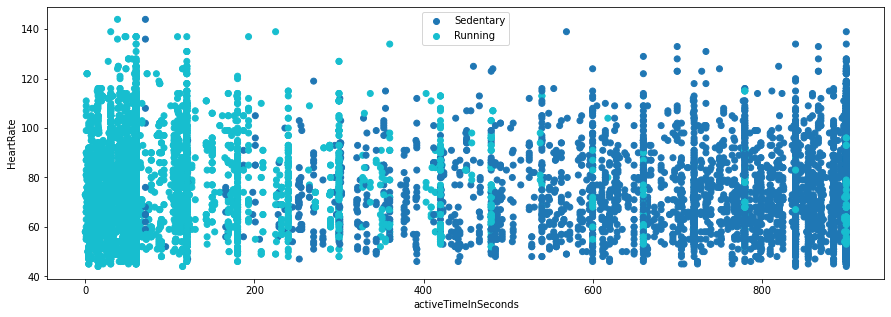

In [34]:
fig, ax = plt.subplots(figsize=(15,5))
sc = ax.scatter('activeTimeInSeconds', 'HeartRate', c='activityType_RUNNING', cmap='tab10', data=Data_dummies)
ax.set(xlabel = 'activeTimeInSeconds', ylabel = 'HeartRate')
ax.legend(handles = sc.legend_elements()[0], labels=['Sedentary', 'Running'])
plt.show()

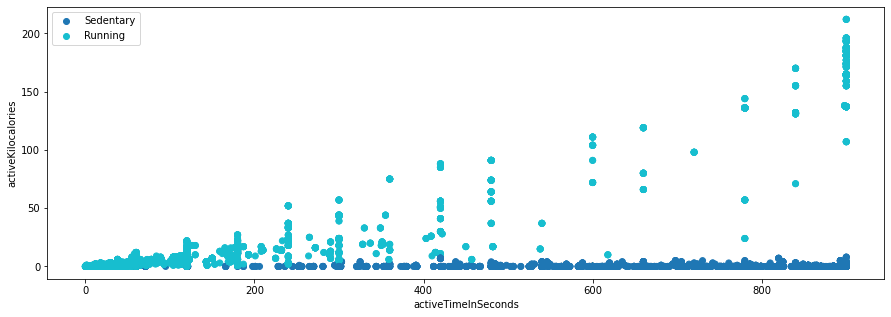

In [35]:
fig, ax = plt.subplots(figsize=(15,5))
sc = ax.scatter('activeTimeInSeconds', 'activeKilocalories', c='activityType_RUNNING', cmap='tab10', data=Data_dummies)
ax.set(xlabel = 'activeTimeInSeconds', ylabel = 'activeKilocalories')
ax.legend(handles = sc.legend_elements()[0], labels=['Sedentary', 'Running'])
plt.show()

In [36]:
Data_RW =  Data.drop(Data[Data['activityType'] == 'SEDENTARY'].index)
Data_RW['activityType'].value_counts()
Data_RW.drop("timeId" , inplace = True , axis = 1)

In [37]:
Data_RW

,activeKilocalories,activeTimeInSeconds,activityType,distanceInMeters,steps,HeartRate
4,21.0,360.0,WALKING,195.69,243.0,80
5,21.0,360.0,WALKING,195.69,243.0,54
9,2.0,60.0,WALKING,37.68,49.0,80
10,2.0,60.0,WALKING,37.68,49.0,104
11,2.0,60.0,WALKING,37.68,49.0,62
...,...,...,...,...,...,...
30641,5.0,60.0,RUNNING,13.84,12.0,69
30642,3.0,60.0,RUNNING,38.03,37.0,59
30643,3.0,60.0,RUNNING,38.03,37.0,64
30644,3.0,60.0,RUNNING,38.03,37.0,57


In [38]:
# one hot encoding all the categories data and getting final dataset
RW_dummies = pd.get_dummies(Data_RW, columns=['activityType'])
RW_dummies

,activeKilocalories,activeTimeInSeconds,distanceInMeters,steps,HeartRate,activityType_RUNNING,activityType_WALKING
4,21.0,360.0,195.69,243.0,80,0,1
5,21.0,360.0,195.69,243.0,54,0,1
9,2.0,60.0,37.68,49.0,80,0,1
10,2.0,60.0,37.68,49.0,104,0,1
11,2.0,60.0,37.68,49.0,62,0,1
...,...,...,...,...,...,...,...
30641,5.0,60.0,13.84,12.0,69,1,0
30642,3.0,60.0,38.03,37.0,59,1,0
30643,3.0,60.0,38.03,37.0,64,1,0
30644,3.0,60.0,38.03,37.0,57,1,0


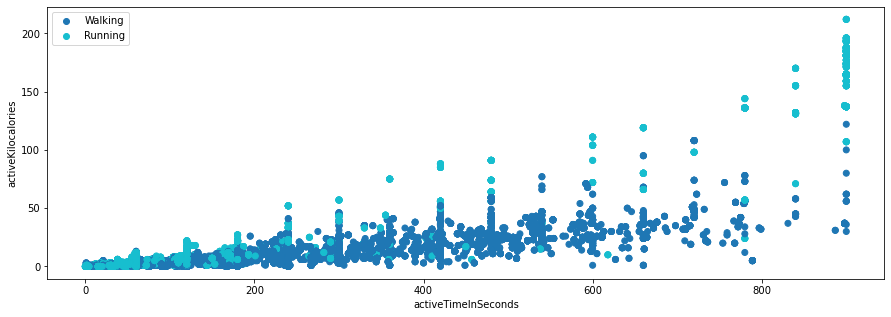

In [39]:
fig, ax = plt.subplots(figsize=(15,5))
sc = ax.scatter('activeTimeInSeconds', 'activeKilocalories', c='activityType_RUNNING', cmap='tab10', data=RW_dummies)
ax.set(xlabel = 'activeTimeInSeconds', ylabel = 'activeKilocalories')
ax.legend(handles = sc.legend_elements()[0], labels=['Walking', 'Running'])
plt.show()

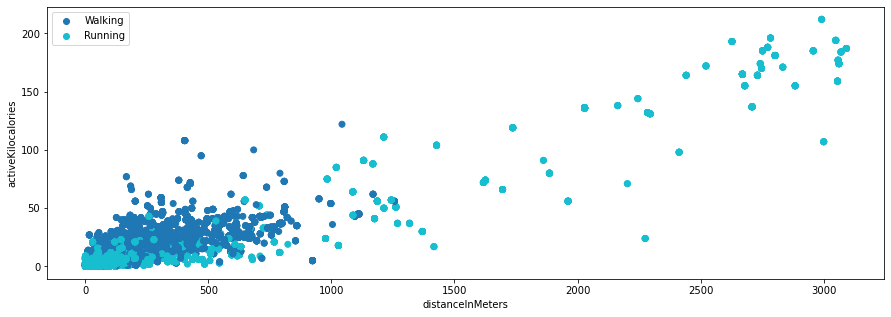

In [40]:
fig, ax = plt.subplots(figsize=(15,5))
sc = ax.scatter('distanceInMeters', 'activeKilocalories', c='activityType_RUNNING', cmap='tab10', data=RW_dummies)
ax.set(xlabel = 'distanceInMeters', ylabel = 'activeKilocalories')
ax.legend(handles = sc.legend_elements()[0], labels=['Walking', 'Running'])
plt.show()

In [41]:
Data_NoId = Data.drop(columns = 'timeId')
Data_NoId

,activeKilocalories,activeTimeInSeconds,activityType,distanceInMeters,steps,HeartRate
0,0.0,900.0,SEDENTARY,0.06,0.0,80
1,0.0,900.0,SEDENTARY,0.06,0.0,54
2,0.0,870.0,SEDENTARY,0.00,0.0,80
3,0.0,870.0,SEDENTARY,0.00,0.0,54
4,21.0,360.0,WALKING,195.69,243.0,80
...,...,...,...,...,...,...
30641,5.0,60.0,RUNNING,13.84,12.0,69
30642,3.0,60.0,RUNNING,38.03,37.0,59
30643,3.0,60.0,RUNNING,38.03,37.0,64
30644,3.0,60.0,RUNNING,38.03,37.0,57


In [90]:
Data_Walking = Data_NoId.drop(Data_NoId[Data_NoId['activityType'] != 'WALKING'].index)
Data_Walking

,activeKilocalories,activeTimeInSeconds,activityType,distanceInMeters,steps,HeartRate
4,21.0,360.0,WALKING,195.69,243.0,80
5,21.0,360.0,WALKING,195.69,243.0,54
9,2.0,60.0,WALKING,37.68,49.0,80
10,2.0,60.0,WALKING,37.68,49.0,104
11,2.0,60.0,WALKING,37.68,49.0,62
...,...,...,...,...,...,...
29696,0.0,60.0,WALKING,9.52,13.0,75
29697,0.0,60.0,WALKING,9.52,13.0,71
29698,0.0,60.0,WALKING,9.52,13.0,77
29699,0.0,60.0,WALKING,9.52,13.0,59


In [91]:
Data_Walking.drop("distanceInMeters", inplace=True, axis=1)
Data_Walking.drop("activityType", inplace=True, axis=1)
Data_Walking.drop("HeartRate", inplace=True, axis=1)
Data_Walking.drop("steps", inplace=True, axis=1)
Data_Walking

,activeKilocalories,activeTimeInSeconds
4,21.0,360.0
5,21.0,360.0
9,2.0,60.0
10,2.0,60.0
11,2.0,60.0
...,...,...
29696,0.0,60.0
29697,0.0,60.0
29698,0.0,60.0
29699,0.0,60.0


In [92]:
Data_Walking.describe()

,activeKilocalories,activeTimeInSeconds
count,11602.000000,11602.000000
mean,9.501551,201.675573
std,12.857492,192.408971
min,0.000000,0.000000
25%,1.000000,60.000000
50%,4.000000,120.000000
75%,13.000000,300.000000
max,122.000000,900.000000


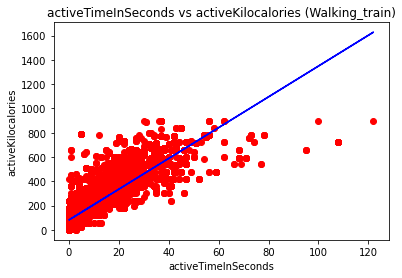

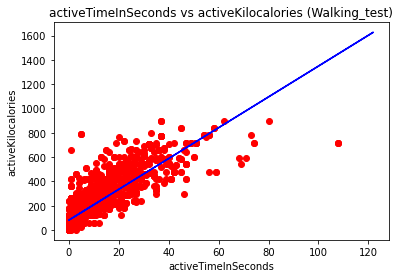

斜率 : 12.668486
截距 : 81.862912


In [93]:
X = Data_Walking.iloc[: , :-1].values
y = Data_Walking.iloc[: , -1].values

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train , y_train)

plt.scatter(X_train , y_train , color = 'red')

plt.plot(X_train , regressor.predict(X_train) , color = 'blue')
plt.title('activeTimeInSeconds vs activeKilocalories (Walking_train)')
plt.xlabel('activeTimeInSeconds')
plt.ylabel('activeKilocalories')
plt.show()

plt.scatter(X_test , y_test , color = 'red')

plt.plot(X_train , regressor.predict(X_train) , color = 'blue')
plt.title('activeTimeInSeconds vs activeKilocalories (Walking_test)')
plt.xlabel('activeTimeInSeconds')
plt.ylabel('activeKilocalories')
plt.show()

print("斜率 : {:4f}".format(float(regressor.coef_)))
print("截距 : {:4f}".format(float(regressor.intercept_)))

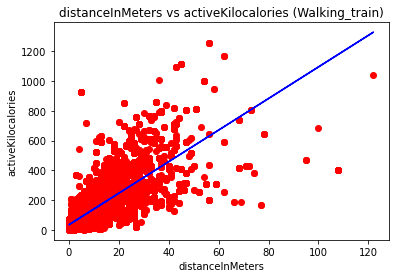

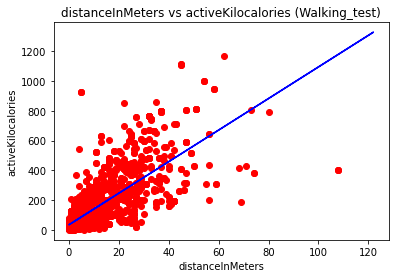

斜率 : 10.598097
截距 : 34.361082


In [89]:
Data_Walking = Data_NoId.drop(Data_NoId[Data_NoId['activityType'] != 'WALKING'].index)

Data_Walking.drop("activeTimeInSeconds", inplace=True, axis=1)
Data_Walking.drop("activityType", inplace=True, axis=1)
Data_Walking.drop("HeartRate", inplace=True, axis=1)
Data_Walking.drop("steps", inplace=True, axis=1)
Data_Walking
X = Data_Walking.iloc[: , :-1].values
y = Data_Walking.iloc[: , -1].values

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train , y_train)

plt.scatter(X_train , y_train , color = 'red')

plt.plot(X_train , regressor.predict(X_train) , color = 'blue')
plt.title('distanceInMeters vs activeKilocalories (Walking_train)')
plt.xlabel('distanceInMeters')
plt.ylabel('activeKilocalories')
plt.show()

plt.scatter(X_test , y_test , color = 'red')

plt.plot(X_train , regressor.predict(X_train) , color = 'blue')
plt.title('distanceInMeters vs activeKilocalories (Walking_test)')
plt.xlabel('distanceInMeters')
plt.ylabel('activeKilocalories')
plt.show()

print("斜率 : {:4f}".format(float(regressor.coef_)))
print("截距 : {:4f}".format(float(regressor.intercept_)))

In [96]:
Data_Running = Data_NoId.drop(Data_NoId[Data_NoId['activityType'] != 'RUNNING'].index)
Data_Running

,activeKilocalories,activeTimeInSeconds,activityType,distanceInMeters,steps,HeartRate
15,10.0,618.0,RUNNING,626.71,498.0,80
16,10.0,618.0,RUNNING,626.71,498.0,104
17,10.0,618.0,RUNNING,626.71,498.0,62
18,2.0,240.0,RUNNING,259.51,258.0,80
19,2.0,240.0,RUNNING,259.51,258.0,104
...,...,...,...,...,...,...
30641,5.0,60.0,RUNNING,13.84,12.0,69
30642,3.0,60.0,RUNNING,38.03,37.0,59
30643,3.0,60.0,RUNNING,38.03,37.0,64
30644,3.0,60.0,RUNNING,38.03,37.0,57


In [97]:
Data_Running.drop("distanceInMeters", inplace=True, axis=1)
Data_Running.drop("activityType", inplace=True, axis=1)
Data_Running.drop("HeartRate", inplace=True, axis=1)
Data_Running.drop("steps", inplace=True, axis=1)
Data_Running

,activeKilocalories,activeTimeInSeconds
15,10.0,618.0
16,10.0,618.0
17,10.0,618.0
18,2.0,240.0
19,2.0,240.0
...,...,...
30641,5.0,60.0
30642,3.0,60.0
30643,3.0,60.0
30644,3.0,60.0


In [98]:
Data_Running.describe()

,activeKilocalories,activeTimeInSeconds
count,9944.000000,9944.000000
mean,11.301287,112.005632
std,31.764213,176.636723
min,0.000000,0.000000
25%,1.000000,32.000000
50%,3.000000,60.000000
75%,6.000000,109.000000
max,212.000000,900.000000


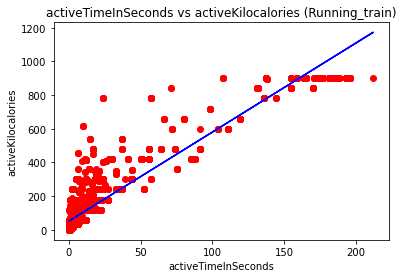

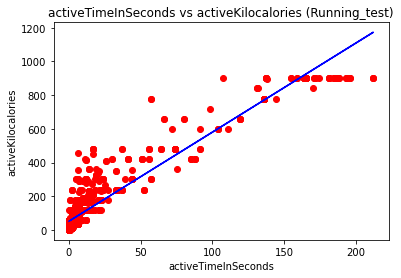

斜率 : 5.284499
截距 : 52.528601


In [99]:
X = Data_Running.iloc[: , :-1].values
y = Data_Running.iloc[: , -1].values

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train , y_train)

plt.scatter(X_train , y_train , color = 'red')

plt.plot(X_train , regressor.predict(X_train) , color = 'blue')
plt.title('activeTimeInSeconds vs activeKilocalories (Running_train)')
plt.xlabel('activeTimeInSeconds')
plt.ylabel('activeKilocalories')
plt.show()

plt.scatter(X_test , y_test , color = 'red')

plt.plot(X_train , regressor.predict(X_train) , color = 'blue')
plt.title('activeTimeInSeconds vs activeKilocalories (Running_test)')
plt.xlabel('activeTimeInSeconds')
plt.ylabel('activeKilocalories')
plt.show()

print("斜率 : {:4f}".format(float(regressor.coef_)))
print("截距 : {:4f}".format(float(regressor.intercept_)))

In [50]:
Dummies = pd.get_dummies(Data_NoId, columns=['activityType'])
Dummies

,activeKilocalories,activeTimeInSeconds,distanceInMeters,steps,HeartRate,activityType_RUNNING,activityType_SEDENTARY,activityType_WALKING
0,0.0,900.0,0.06,0.0,80,0,1,0
1,0.0,900.0,0.06,0.0,54,0,1,0
2,0.0,870.0,0.00,0.0,80,0,1,0
3,0.0,870.0,0.00,0.0,54,0,1,0
4,21.0,360.0,195.69,243.0,80,0,0,1
...,...,...,...,...,...,...,...,...
30641,5.0,60.0,13.84,12.0,69,1,0,0
30642,3.0,60.0,38.03,37.0,59,1,0,0
30643,3.0,60.0,38.03,37.0,64,1,0,0
30644,3.0,60.0,38.03,37.0,57,1,0,0


Text(0.5, 1.0, 'Correlation Matrix')

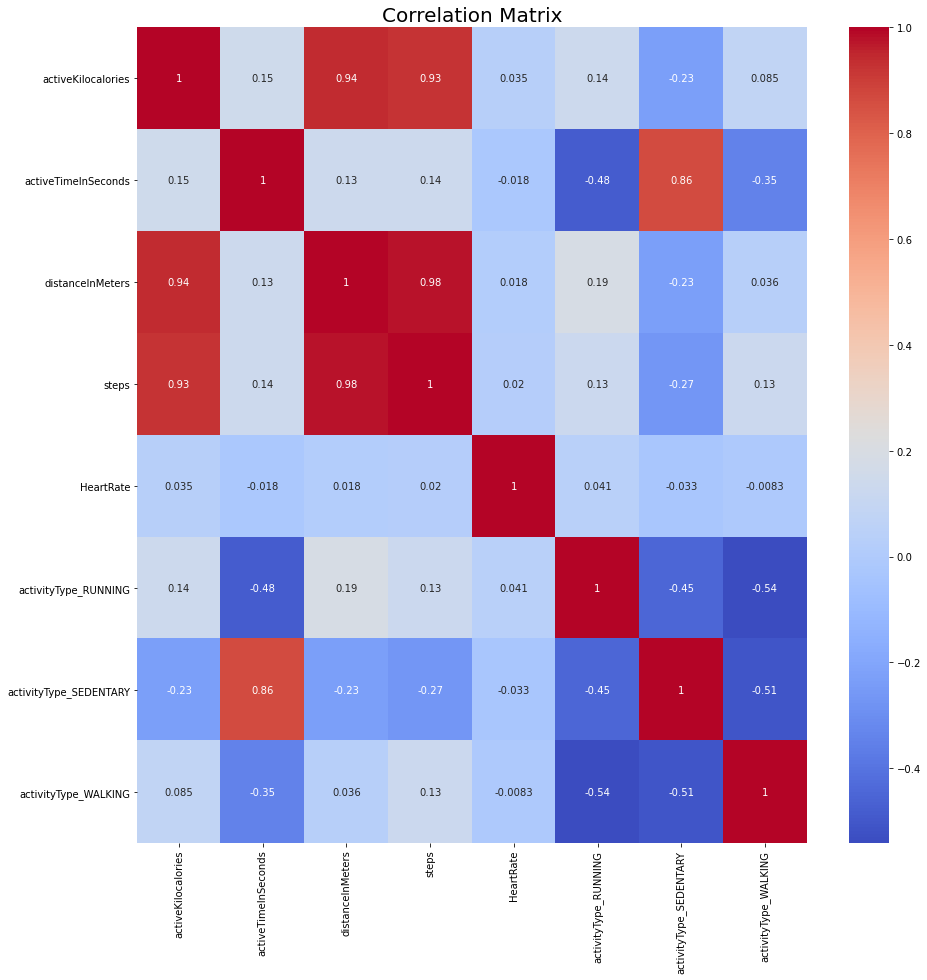

In [51]:
plt.figure(figsize=(15, 15))
sns.heatmap(Dummies.corr(), annot=True , cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=20)

In [52]:
Dummies.corr()['activityType_RUNNING'].sort_values(ascending = False)[1:]

distanceInMeters          0.189812
activeKilocalories        0.136626
steps                     0.130162
HeartRate                 0.041165
activityType_SEDENTARY   -0.450414
activeTimeInSeconds      -0.483804
activityType_WALKING     -0.540956
Name: activityType_RUNNING, dtype: float64

In [53]:
Dummies.corr()['activityType_WALKING'].sort_values(ascending = False)[1:]

steps                     0.128750
activeKilocalories        0.084695
distanceInMeters          0.036009
HeartRate                -0.008254
activeTimeInSeconds      -0.347034
activityType_SEDENTARY   -0.507253
activityType_RUNNING     -0.540956
Name: activityType_WALKING, dtype: float64

In [54]:
Dummies.corr()['activityType_SEDENTARY'].sort_values(ascending = False)[1:]

activeTimeInSeconds     0.864133
HeartRate              -0.033418
activeKilocalories     -0.229904
distanceInMeters       -0.232719
steps                  -0.270047
activityType_RUNNING   -0.450414
activityType_WALKING   -0.507253
Name: activityType_SEDENTARY, dtype: float64

In [63]:
Data_NoId

,activeKilocalories,activeTimeInSeconds,activityType,distanceInMeters,steps,HeartRate
0,0.0,900.0,SEDENTARY,0.06,0.0,80
1,0.0,900.0,SEDENTARY,0.06,0.0,54
2,0.0,870.0,SEDENTARY,0.00,0.0,80
3,0.0,870.0,SEDENTARY,0.00,0.0,54
4,21.0,360.0,WALKING,195.69,243.0,80
...,...,...,...,...,...,...
30641,5.0,60.0,RUNNING,13.84,12.0,69
30642,3.0,60.0,RUNNING,38.03,37.0,59
30643,3.0,60.0,RUNNING,38.03,37.0,64
30644,3.0,60.0,RUNNING,38.03,37.0,57


In [69]:
X = Data_NoId.iloc[: , 1:].values
y = Data_NoId.iloc[: , 1].values

ct = ColumnTransformer(transformers = [('encoder' , OneHotEncoder() , [1])] , remainder = 'passthrough')
X = ct.fit_transform(X)
X

array([[0.0, 1.0, 0.0, ..., 0.06, 0.0, 80],
       [0.0, 1.0, 0.0, ..., 0.06, 0.0, 54],
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, 80],
       ...,
       [1.0, 0.0, 0.0, ..., 38.03, 37.0, 64],
       [1.0, 0.0, 0.0, ..., 38.03, 37.0, 57],
       [1.0, 0.0, 0.0, ..., 38.03, 37.0, 72]], dtype=object)

In [71]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

In [74]:
import statsmodels.api as sm
X_opt = np.array(X_train[: , [0 , 1 , 2]] , dtype=float)
regressor_OLS = sm.OLS(endog = y_train , exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                 3.881e+04
Date:                Wed, 04 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:02:59   Log-Likelihood:            -1.6117e+05
No. Observations:               24516   AIC:                         3.223e+05
Df Residuals:                   24513   BIC:                         3.224e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           111.8418      1.945     57.514      0.000     108.030     115.653
x2           829.2897      2.026    409.280      0.000     825.318     833.261
x3           201.9772      1.802    112.109      0.000     198.446     205.508
==============================================================================
Omnibus:                     7060.689   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35202.733
Skew:                           1.309   Prob(JB):                         0.00
Kurtosis:                       8.254   Cond. No.                         1.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                 3.881e+04
Date:                Wed, 04 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:03:09   Log-Likelihood:            -1.6117e+05
No. Observations:               24516   AIC:                         3.223e+05
Df Residuals:                   24513   BIC:                         3.224e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           111.8418      1.945     57.514      0.0